<a href="https://colab.research.google.com/github/adildhkh/deep-learning/blob/main/style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function, division
from keras.layers import Input, Lambda, Dense, Flatten
from keras.layers import AveragePooling2D, MaxPooling2D, Conv2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_l_bfgs_b
from datetime import datetime

In [ ]:
def VGG16_AvgPool(shape):
    vgg = VGG16(input_shape=shape, weights='imagenet', include_top=False)
    new_model = Sequential()
    for layer in vgg.layers:
        if isinstance(layer, MaxPooling2D):
            # Use the same pool size as the original MaxPooling2D layer
            pool_size = layer.pool_size if hasattr(layer, 'pool_size') else (2, 2)
            new_model.add(AveragePooling2D(pool_size=pool_size))
        else:
            new_model.add(layer)
    return new_model



# Function to create a partial model with intermediate convolutions
def VGG16_AvgPool_cutoff(shape, num_convs):
    if num_convs < 1 or num_convs > 13:
        print('num_convs must be in the range [1, 13]')
        return None

    model = VGG16_AvgPool(shape)
    new_model = Sequential()
    n = 0
    for layer in model.layers:
        if isinstance(layer, Conv2D):
            n += 1
            new_model.add(layer)
            if n >= num_convs:
                break
    return new_model


# Function to un-preprocess an image
def unpreprocess(img):
    img[..., 0] += 103.939
    img[..., 1] += 116.779
    img[..., 2] += 126.68
    img = img[..., ::-1]
    return img


# Function to rescale an image
def scale_img(x):
    x = x - x.min()
    x = x / x.max()
    return x


# Wrapper for loss and gradient computation
def get_loss_and_grads_wrapper(x_vec):
    l, g = get_loss_and_grads([x_vec.reshape(*batch_shape)])
    return l.astype(np.float64), g.flatten().astype(np.float64)

In [ ]:
import tensorflow as tf  # Import TensorFlow for Variable




In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import AveragePooling2D, Conv2D
from keras.applications import VGG16

def VGG16_AvgPool_cutoff(shape, num_convs):
    if num_convs < 1 or num_convs > 13:
        raise ValueError("num_convs must be in the range [1, 13]")

    # Load VGG16 model
    vgg = VGG16(input_shape=shape, weights='imagenet', include_top=False)

    # Build new model
    new_model = Sequential()
    conv_count = 0

    for layer in vgg.layers:
        if isinstance(layer, Conv2D):
            conv_count += 1
        if isinstance(layer, tf.keras.layers.MaxPooling2D):
            new_model.add(AveragePooling2D(pool_size=2))
        else:
            new_model.add(layer)

        # Stop adding layers after the specified number of convolutions
        if conv_count >= num_convs:
            break

    return new_model

# Input dimensions
shape = (224, 224, 3)

# Create the model
content_model = VGG16_AvgPool_cutoff(shape, num_convs=1)

# Define a dummy input for gradient calculation
x = tf.random.uniform((1, *shape))  # A random input image

# Generate the target features
target = tf.Variable(content_model(x))  # Save the target features

# Compute loss and gradients using GradientTape
with tf.GradientTape() as tape:
    tape.watch(x)  # Track gradients with respect to the input
    content_output = content_model(x)  # Forward pass
    loss = tf.reduce_mean(tf.square(target - content_output))  # Compute loss

# Calculate gradients
grads = tape.gradient(loss, x)

print("Loss:", loss.numpy())
print("Gradients computed successfully:", grads)




Loss: 0.0
Gradients computed successfully: tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 224, 224, 3), dtype=float32)


Iteration 10/100, Loss: 1709.6964
Iteration 20/100, Loss: 1709.6917
Iteration 30/100, Loss: 1709.6902
Iteration 40/100, Loss: 1709.6897
Iteration 50/100, Loss: 1709.6895
Iteration 60/100, Loss: 1709.6895
Iteration 70/100, Loss: 1709.6895
Iteration 80/100, Loss: 1709.6891
Iteration 90/100, Loss: 1709.6891
Iteration 100/100, Loss: 1709.6890


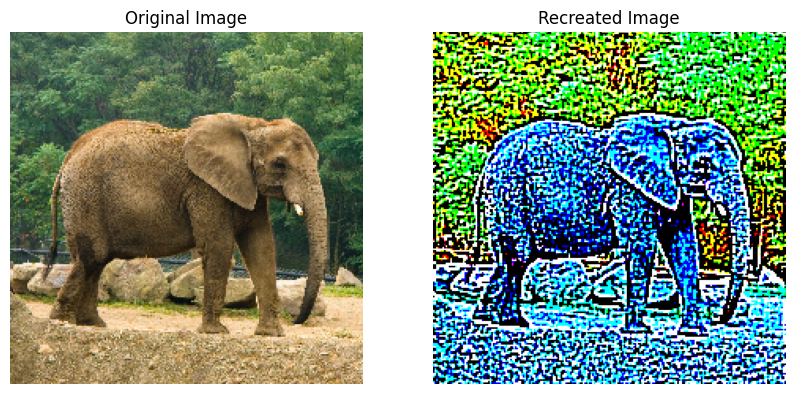

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D, Conv2D
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to create a modified VGG16 model
def VGG16_AvgPool_cutoff(shape, num_convs):
    if num_convs < 1 or num_convs > 13:
        raise ValueError("num_convs must be in the range [1, 13]")

    # Load VGG16 model
    vgg = VGG16(input_shape=shape, weights='imagenet', include_top=False)

    # Build new model
    new_model = Sequential()
    conv_count = 0

    for layer in vgg.layers:
        if isinstance(layer, Conv2D):
            conv_count += 1
        if isinstance(layer, tf.keras.layers.MaxPooling2D):
            new_model.add(AveragePooling2D(pool_size=2))
        else:
            new_model.add(layer)

        # Stop adding layers after the specified number of convolutions
        if conv_count >= num_convs:
            break

    return new_model

# Function to recreate the content image
def recreate_content(content_image_path, num_convs=1, iterations=100, learning_rate=10.0):
    # Load content image
    img = image.load_img(content_image_path, target_size=(224, 224))
    x = np.expand_dims(image.img_to_array(img), axis=0)
    x = preprocess_input(x)  # Preprocess for VGG16

    # Get batch and image shape
    batch_shape = x.shape
    shape = x.shape[1:]

    # Create VGG16 model with modified pooling layers
    content_model = VGG16_AvgPool_cutoff(shape, num_convs)

    # Set target features
    target = tf.Variable(content_model(x))  # Use the content model output as the target

    # Initialize a random image
    generated_image = tf.Variable(tf.random.uniform(batch_shape, -0.25, 0.25))

    # Optimizer
    optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

    # Optimization loop
    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(generated_image)
            generated_output = content_model(generated_image)
            loss = tf.reduce_mean(tf.square(target - generated_output))

        # Compute gradients
        grads = tape.gradient(loss, generated_image)
        optimizer.apply_gradients([(grads, generated_image)])

        # Clip values to maintain valid image range
        generated_image.assign(tf.clip_by_value(generated_image, -1.0, 1.0))

        # Print progress
        if (i + 1) % 10 == 0:
            print(f"Iteration {i + 1}/{iterations}, Loss: {loss.numpy():.4f}")

    # Post-process and return generated image
    return deprocess_image(generated_image.numpy()[0])

# Helper function to deprocess the image
def deprocess_image(x):
    # Reverse preprocessing for VGG16
    x += 1.0
    x *= 127.5
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# Main script
if __name__ == '__main__':
    # Path to the content image
    content_image_path = '/content/elephant.jpeg'  # Update this to your content image path

    # Recreate content image
    recreated_image = recreate_content(content_image_path, num_convs=1, iterations=100, learning_rate=10.0)

    # Display the original and recreated images
    original_image = image.load_img(content_image_path, target_size=(224, 224))
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Recreated Image")
    plt.imshow(recreated_image)
    plt.axis('off')

    plt.show()









In [15]:
!pip install tensorflow numpy matplotlib pillow


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

# Define the style and content layers
style_layers = [
    'block1_conv1',
    'block2_conv1',
    'block3_conv1',
    'block4_conv1',
    'block5_conv1',
]

content_layers = ['block5_conv2']

# Load pre-trained VGG19 model for feature extraction
vgg = VGG19(weights='imagenet', include_top=False)

# Extract features from the model layers
def get_model():
    # Get the model outputs for both style and content layers
    outputs = [vgg.get_layer(name).output for name in style_layers + content_layers]
    model = tf.keras.models.Model(inputs=vgg.input, outputs=outputs)
    return model

# Function to load and preprocess the image
def load_and_process_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = tf.expand_dims(img, axis=0)  # Add batch dimension
    img = tf.cast(img, tf.float32)
    img = preprocess_input(img)  # Preprocess image for VGG19
    return img

# Function to deprocess the image (for visualization)
def deprocess_image(img):
    img = img.numpy().squeeze()
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

# Function to extract features from an image
def extract_features(model, img):
    # Run the image through the model to extract style and content features
    outputs = model(img)
    style_features = outputs[:len(style_layers)]
    content_features = outputs[len(style_layers):]
    return style_features, content_features

# Function to compute the Gram matrix of a given feature map
def gram_matrix(input_tensor):
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)
    return result / num_locations

# Compute style loss
def compute_style_loss(style_features, target_style_features):
    style_loss = 0
    for style, target_style in zip(style_features, target_style_features):
        gram_style = gram_matrix(style)
        gram_target_style = gram_matrix(target_style)
        style_loss += tf.reduce_mean(tf.square(gram_style - gram_target_style))
    return style_loss

# Compute content loss
def compute_content_loss(content_features, target_content_features):
    content_loss = 0
    for content, target_content in zip(content_features, target_content_features):
        content_loss += tf.reduce_mean(tf.square(content - target_content))
    return content_loss

# Compute the total loss (style + content)
def compute_total_loss(style_features, content_features, target_style_features, target_content_features, style_weight=1e-2, content_weight=1e4):
    style_loss = compute_style_loss(style_features, target_style_features)
    content_loss = compute_content_loss(content_features, target_content_features)
    total_loss = style_weight * style_loss + content_weight * content_loss
    return total_loss

# Perform the optimization step
def train_step(img, model, target_style_features, target_content_features, optimizer, style_weight=1e-2, content_weight=1e4):
    with tf.GradientTape() as tape:
        tape.watch(img)
        style_features, content_features = extract_features(model, img)
        loss = compute_total_loss(style_features, content_features, target_style_features, target_content_features, style_weight, content_weight)
    gradients = tape.gradient(loss, img)
    optimizer.apply_gradients([(gradients, img)])
    return loss

# Perform the style transfer
def style_transfer(image_path, target_img_path, num_iterations=1000, style_weight=1e-2, content_weight=1e4):
    # Load and preprocess the target image (content image)
    content_img = load_and_process_image(image_path)

    # Load and preprocess the style image
    style_img = load_and_process_image(target_img_path)

    # Create the model for feature extraction
    model = get_model()

    # Extract style and content features from the style and content images
    style_features, content_features = extract_features(model, style_img)
    target_style_features, target_content_features = extract_features(model, content_img)

    # Initialize the generated image (we can start with the content image)
    generated_img = tf.Variable(content_img, dtype=tf.float32)

    # Define the optimizer
    optimizer = tf.optimizers.Adam(learning_rate=0.02)

    # Lists to store loss values for plotting
    style_loss_values = []
    content_loss_values = []
    total_loss_values = []

    # Training loop
    for i in range(num_iterations):
        loss = train_step(generated_img, model, style_features, content_features, optimizer, style_weight, content_weight)
        style_loss = compute_style_loss(style_features, target_style_features)
        content_loss = compute_content_loss(content_features, target_content_features)

        style_loss_values.append(style_loss.numpy())
        content_loss_values.append(content_loss.numpy())
        total_loss_values.append(loss.numpy())

        # Print the progress and plot the loss curve
        if i % 100 == 0:
            print(f"Iteration {i}/{num_iterations} - Loss: {loss.numpy()}")

    # Plot the loss curves
    plt.plot(style_loss_values, label='Style Loss')
    plt.plot(content_loss_values, label='Content Loss')
    plt.plot(total_loss_values, label='Total Loss')
    plt.legend()
    plt.show()

    # De-process the generated image for visualization
    final_img = deprocess_image(generated_img)

    # Display the final stylized image
    plt.imshow(final_img)
    plt.title('Stylized Image')
    plt.axis('off')
    plt.show()














80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Iteration 0/10000 - Loss: 1001128000.0
Iteration 100/10000 - Loss: 664569408.0
Iteration 200/10000 - Loss: 457663488.0
Iteration 300/10000 - Loss: 342962816.0
Iteration 400/10000 - Loss: 278475040.0
Iteration 500/10000 - Loss: 237843568.0
Iteration 600/10000 - Loss: 208036016.0
Iteration 700/10000 - Loss: 184547136.0
Iteration 800/10000 - Loss: 165359760.0
Iteration 900/10000 - Loss: 149349728.0
Iteration 1000/10000 - Loss: 135859040.0
Iteration 1100/10000 - Loss: 124398960.0
Iteration 1200/10000 - Loss: 114594704.0
Iteration 1300/10000 - Loss: 106223648.0
Iteration 1400/10000 - Loss: 98962712.0
Iteration 1500/10000 - Loss: 92595328.0
Iteration 1600/10000 - Loss: 86917520.0
Iteration 1700/10000 - Loss: 81850136.0
Iteration 1800/10000 - Loss: 77302824.0
Iteration 1900/10000 - Loss: 73168912.0
Iteration 2000/10000 - Loss: 69397136.0
Iteration 2100/10000 - Loss: 65964704.0
Iteration 2200/10000 - Loss: 62860528.0
Iteration 2300/10000 - Loss: 60008804.0
Iteration 2400/10000 - Loss: 57389344

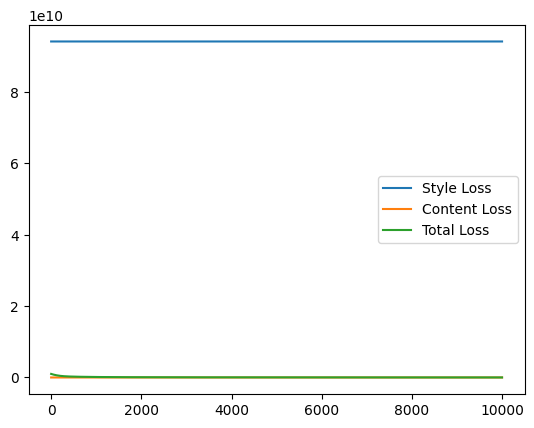

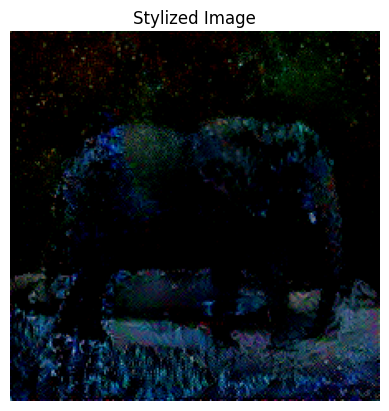

In [5]:
# Example usage
image_path = '/content/elephant.jpeg'  # Replace with your content image path
target_img_path = '/content/starrynight.jpeg'  # Replace with your style image path
style_transfer(image_path, target_img_path, num_iterations=10000)